<a href="https://colab.research.google.com/github/kashifkamran639/Airbnb-NYC-2019/blob/main/Kashif_Kamran_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> 1. <u>Defining Problem Statement</u> :
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

 <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

 <u> Explore and analyze the data to discover key understandings (not limited to these) such as :</u>

* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

## **<u>Steps performed in this EDA Projests</u> :**

Handling this dataset with the fundamental steps to unveil the factors :

* Imports Libraries, Dataset and Other modules
* Analyzing Data : Reading & Inspection of Data.
    *   Data Structure (Head , Tail or Body)
    *   Data information (basic schema)
    *   Arithmetic measurement (data descriptions)
* Data Preparation & Processing
    *   Data Cleaning
    *   Handling Outliners 
* Exploratory Analysis
    *   Identifying relation of dependent variables with Problem set.
    *   Visualization using different plots in relation with question.
* Key Findings and Conclusion


# <b>2. <u>Lets Importing Required Libraries and Mount Drive and dataset</u>

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading Dataset
bnb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone-1/Airbnb NYC 2019.csv')

# <b> 3. <u>DATA EXPLORATION</u> :</b>

* Lets dive into the data, we will see top 5 rows, bottom 5 rows, shape, size and Geometry of our data.

In [4]:
# Checking Shape and size of dataset
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Seeing top 5 Rows
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Seeing Bottom 5 Rows
bnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [9]:
# let's look at the statistical aspects of the dataframes
bnb.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


##**Conclusion**:

Dataset has 48895 Rows/Entries and 16 Column all data types are in required format except last_review which is an object should be in date time format.

Also from `describe` funtion to get a summary statistics of the numeric data, We can see that the data need cleanning, We also observe that there are some outliers for **price and minimum_nights**. Other columns such as **number_of_reviews and calculated_host_listings_count** are skewed toward right.

There are total 3 categorical data  neighbourhood_group (5 Unique Values), room_type (3 unique values), neighbourhood (221 unique values).

In [10]:
#Copying the original dataset for cleaning operation 
df_nyc = bnb.copy() 

# **4. DATA PREPARATION**



## **Data Cleaning**

In [11]:
# Let's check for the Null Values 
Total = df_nyc.isnull().sum().sort_values(ascending=False)
Percentage = (df_nyc.isnull().sum()/df_nyc.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([Total,Percentage], axis=1, keys=['Total','Percentage']) 
missing_value

,Total,Percentage
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


In [12]:
for i in df_nyc.columns:
    ab = df_nyc[i].isnull().sum()
    if ab != 0:
        print(i + " column has {} null values.".format(ab))
        print()

name column has 16 null values.

host_name column has 21 null values.

last_review column has 10052 null values.

reviews_per_month column has 10052 null values.



As we can see there are some Null Values in **host_name**, **name** , **last_review** and **reviews_per_month** 

<u/>**host_name**& **name**</u> : Missing Values are 21 & 16 both are less than 0.5% so will simply drop the rows corresponding to the missing values in those column.

<u/>**last_review** and **reviews_per_month**</u> : we found Null Values are for those properties which doesn't have any reviews. so will replace all the Null values of review_per_month with zero ('0') and drop the **last_review** as column has very high Null Values and negligible relevance with our problem set for EDA.

In [13]:
#Let's Drop the last_review Column
df_nyc.drop(['last_review'], axis=1,inplace=True)

In [14]:
#Making function for imputing zero in place of null values
#however we can always yse df_nyc.fillna({'reviews_per_month':0}, inplace=True)
def impute_zero(series):
    return series.fillna(0)

df_nyc.reviews_per_month=df_nyc["reviews_per_month"].transform(impute_zero)

In [15]:
# Droping Corresponding rows of name and host_name column having null values.
df_nyc=df_nyc.dropna(subset=['name', 'host_name'])

In [16]:
#better to double check
df_nyc.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
#check the final shape
df_nyc[df_nyc.price==0].shape

(11, 15)

We can clearly see the total of eleven entries need to be drop whose price is 0 so going forward excluding those entries having price = 0

In [18]:
#Filter the rows wherever price is zero
df = df_nyc[df_nyc['price'] !=0]

## **Handing Outliers**



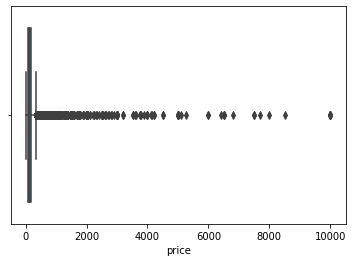

In [19]:
#Boxplot for price column
sns.boxplot(x=df['price'])

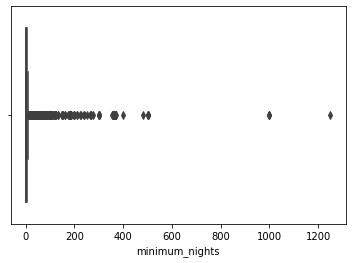

In [20]:
#Boxplot for minimum_nights column
sns.boxplot(x=df['minimum_nights'])

In [21]:
# Adding z score column for price and minimum_nights as z_price and z_min_nights
df['z_price'] = np.abs(stats.zscore(df['price']))
df['z_min_nights'] = np.abs(stats.zscore(df['minimum_nights']))

In [22]:
# removing rows wherever z scroe equal or greater than 3
df = df[(df['z_price'] < 3)]
df = df[(df['z_min_nights'] < 3)]

In [23]:
# Droping 'z_price' and 'z_min_nights' as purpose for the column is served.
df.drop(['z_price','z_min_nights'],axis=1,inplace=True)

## **Checking Correlations for Numerial Data**

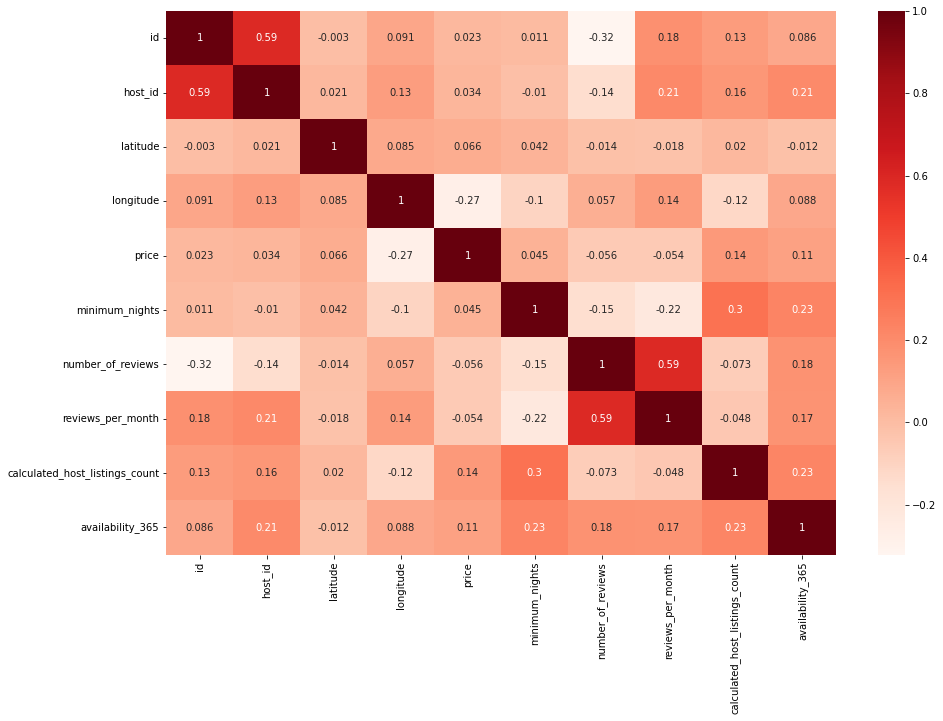

In [24]:
#let's analysize if there is any numerical corelation.
plt.figure(figsize=(15,10))
abnb_corr = df.corr()
heatmap=sns.heatmap(abnb_corr ,cbar=True,annot=True, cmap="Reds")

We did not found any potential correlation between the numerical variables except number of reviews and reviews per month.


In [25]:
# Checking the final shape, size and properties of the final data set for Analysis.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48149 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48149 non-null  int64  
 1   name                            48149 non-null  object 
 2   host_id                         48149 non-null  int64  
 3   host_name                       48149 non-null  object 
 4   neighbourhood_group             48149 non-null  object 
 5   neighbourhood                   48149 non-null  object 
 6   latitude                        48149 non-null  float64
 7   longitude                       48149 non-null  float64
 8   room_type                       48149 non-null  object 
 9   price                           48149 non-null  int64  
 10  minimum_nights                  48149 non-null  int64  
 11  number_of_reviews               48149 non-null  int64  
 12  reviews_per_month               

## **Conclusion from data preparation**

We handled null values, removed unnecessary column and rows, handles outliers and comeup with the final dataset for our Exploratory Analysis.
final dataset have 48148 rows/entries, 15 column/variables and all in requires data types.

So yeah!! we are ready to explore some amazing facts.

# <b> 5. EXPLORATORY ANALYSIS</b>



## **<u>What can we learn about different hosts and areas?**

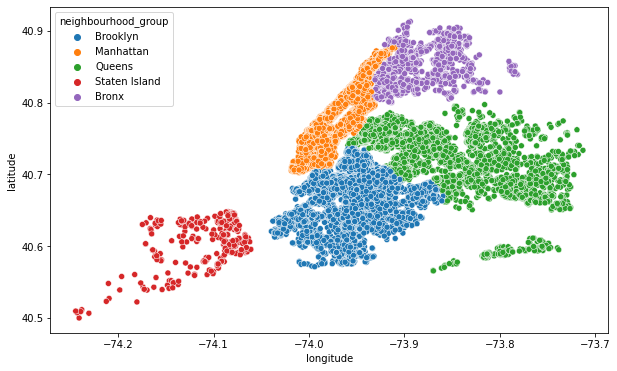

In [26]:
#First come first lets Visualise the Neighbourhood Group using the the Latitude and Longitude data corresponds to the Neighbourhood Group data.
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

               host_name neighbourhood_group  calculated_host_listings_count
13082       Sonder (NYC)           Manhattan                             327
1806          Blueground            Brooklyn                             232
1807          Blueground           Manhattan                             232
7205                Kara           Manhattan                             121
7407              Kazuya           Manhattan                             103
7408              Kazuya              Queens                             103
7406              Kazuya            Brooklyn                             103
6477      Jeremy & Laura           Manhattan                              96
13081             Sonder           Manhattan                              96
2866   Corporate Housing           Manhattan                              91


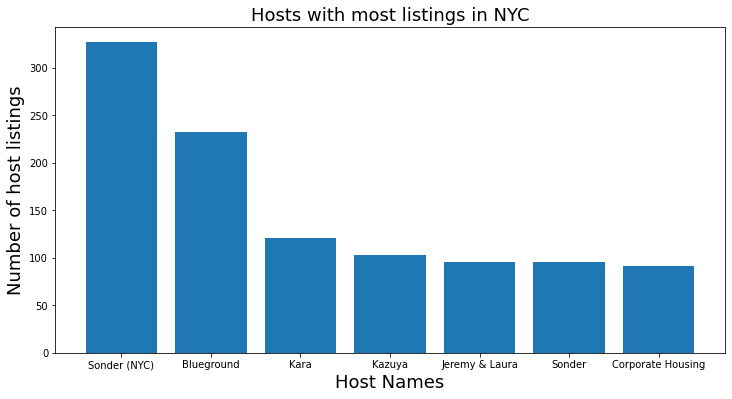

In [27]:
# Let's see Top 10 Hosts which has the most listings with their neighbourhood.
host_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(10)
print(top_hosts)
plt.rcParams['figure.figsize'] = (12,6)
host_name = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_lisitng)
plt.title('Hosts with most listings in NYC',{'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show()

Sonder(NYC) from Manhatten has the highest Number of Listing. 

Also Seven Out of Top 10 are from Single neighbourhood Group so we can think of Manhattan seems to be highest contributor in neighbourhood group, our hypothesis can be wrong or could be right we will find out in coming analysis in Neighbourhood group.

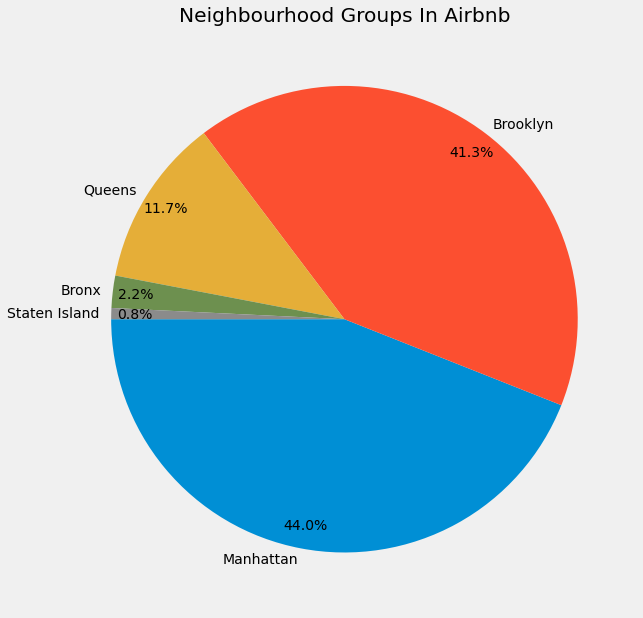

In [28]:
# Analysing the percentage of Booking in different Neighbourhood Group.
labels = df.neighbourhood_group.value_counts().index
explode = [0,0,0,0,0]
sizes = df.neighbourhood_group.value_counts().values
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.title("Neighbourhood Groups In Airbnb")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%',pctdistance=.9,labeldistance=1.05, startangle=180)
plt.show()

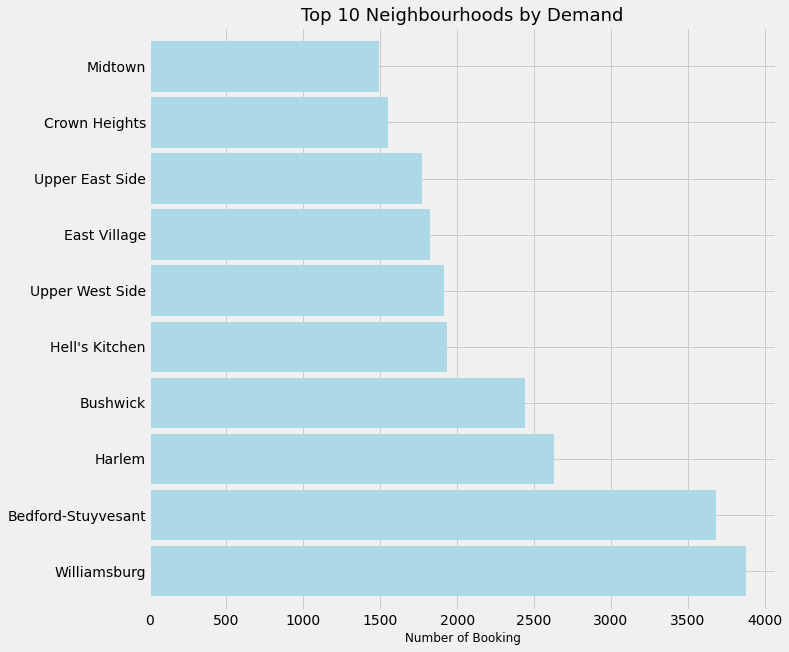

In [29]:
# Lets See who are the Top Neighbourhood in Demand by Number of Listings
feq=df['neighbourhood'].value_counts().sort_values(ascending=False)
feq[:10].plot.barh(figsize=(10, 10), width=0.9, color = 'lightblue')
plt.title("Top 10 Neighbourhoods by Demand", fontsize=18)
plt.xlabel('Number of Booking', fontsize=12)
plt.show()

In [30]:
neighbour = df.groupby(['neighbourhood', 'neighbourhood_group'])['id'].count().reset_index()
top_neighbour = neighbour.sort_values(by = ['id'], ascending = False).head(10)
top_neighbour.rename(columns={'id':'Total Bookings'},inplace=True)
print(top_neighbour)

          neighbourhood neighbourhood_group  Total Bookings
214        Williamsburg            Brooklyn            3878
13   Bedford-Stuyvesant            Brooklyn            3680
94               Harlem           Manhattan            2632
28             Bushwick            Brooklyn            2444
95       Hell's Kitchen           Manhattan            1933
202     Upper West Side           Manhattan            1915
64         East Village           Manhattan            1826
201     Upper East Side           Manhattan            1769
51        Crown Heights            Brooklyn            1552
127             Midtown           Manhattan            1494


- So even though Manhattan is smaller by area with 44% Manhattean has the Highest Trafic Followed by Brooklyn which has 41.3%.
- Also Williamsburg being the Top Neighbour from brooklyn followed by Bedford-stuyvesant both from Brooklyn.
- In Top 10 neighbours 6 are from Manhatten 4 from Brooklyn only.

## **<u>What can we learn from predictions?</u> (ex: locations, prices, reviews, etc)**

<Figure size 720x1440 with 0 Axes>

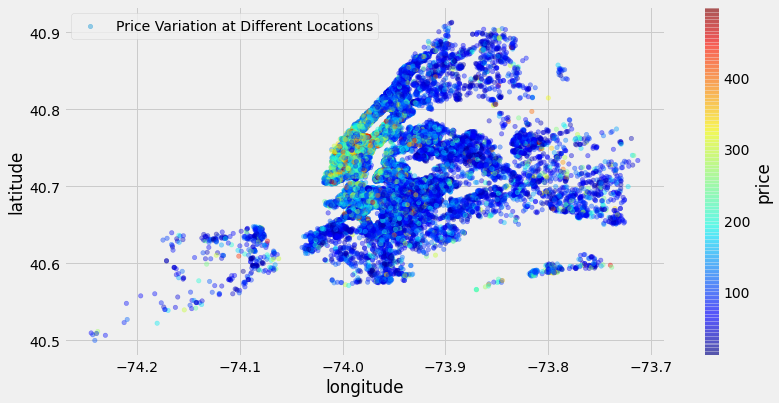

In [31]:
#Understanding the Price distribution for Different Cordinates.
plt.figure(figsize=(10,20))
ax=df[df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='Price Variation at Different Locations',c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4)
ax.legend()
plt.ion()
plt.show()

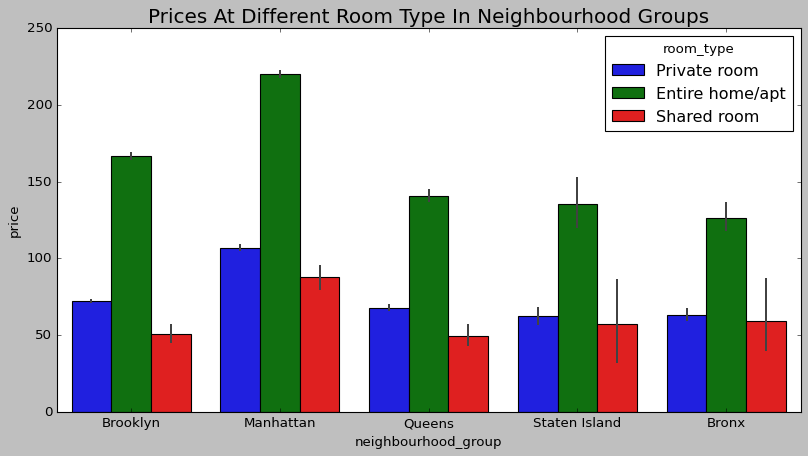

In [32]:
# Understanding The price Distribution in Different Neighbourhood Group By Room Type
plt.style.use('classic')
plt.figure(figsize=(12,6))
plt.title("Prices At Different Room Type In Neighbourhood Groups",color = 'black',fontsize = 18)
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.show()

- As Expected Price of the Entire Home/Apt is Very High in all Neighbouhood Group followed by Private Room.
- Also Comparing the price in Manhattan is Reletively High for Entire Home/Apt followed by Brooklyn and almost similar for Queens Staten Island Bronx
- we can think of as Demand for Entire Home/Apt is higher specially in Manhattan and Brooklyn thus push the price at higher side.

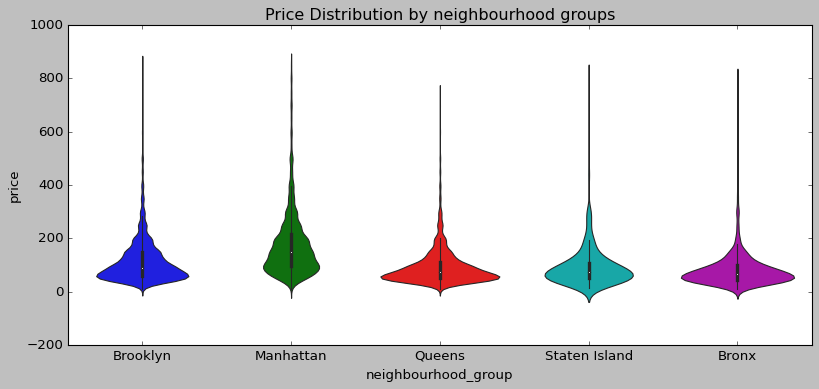

In [33]:
# Understanding the Price Distribution of different Neighbourhood Group using a very beautiful Violin Plot.
plt.figure(figsize=(12,5))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=df).set_title('Price Distribution by neighbourhood groups')
plt.show()

We can see that Manhattan has a higher price range with evenly distributed price range compare to others and is the most expensive one. Brooklyn has the second-highest rental prices, while the Bronx appears as the most affordable one.


  neighbourhood_group  number_of_reviews
1            Brooklyn             483458
2           Manhattan             450475
3              Queens             156596
0               Bronx              28227
4       Staten Island              11541


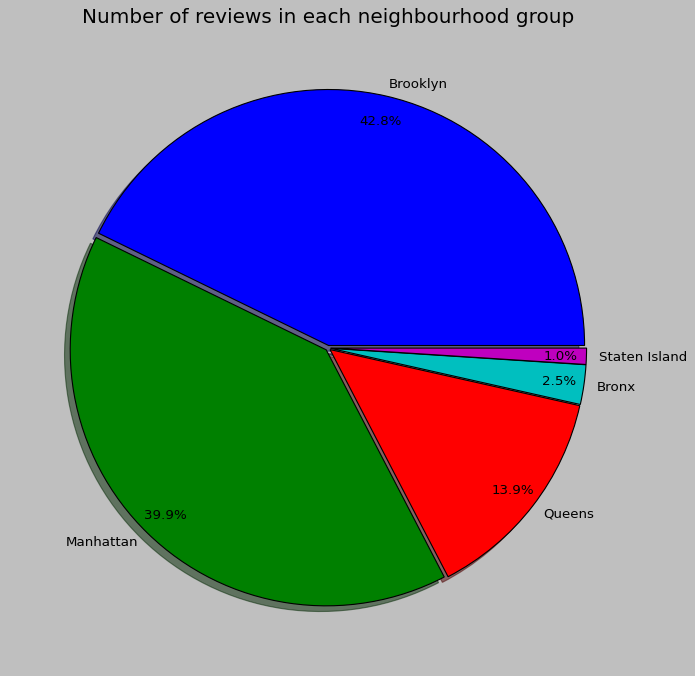

In [34]:
# Checking neighbourhood group which has More number of reviews. 
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].aggregate(np.sum).reset_index().sort_values('number_of_reviews', ascending = False)
print(areas_reviews)

# Lets Visualise the number of reviews in each neighbourhood group using pie chart.
plt.rcParams['figure.figsize'] = (15,10)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews, labels = areas_reviews['neighbourhood_group'], autopct ='%0.1f%%', startangle =0,pctdistance=.9,labeldistance=1.05, explode = [0.01,0.01,0.01,0.01,0.01], shadow = True )
plt.title('Number of reviews in each neighbourhood group', {'fontsize': 18})
plt.show()

Maximum Reviews are for Brooklyn followed by Manhatten Group and least number of total reviews are for Staten Island.

## **<u>Which hosts are the busiest and why?**


Busiest hosts would be those who have maximum number of reviews as people are booking frequently at those hosts or One having highest total no minimum night stay.

In [35]:
# Let see Busiest Host by No of Reviews.
busiest_hosts = df.groupby(['host_name','host_id','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,neighbourhood_group,number_of_reviews
10172,Dona,47621202,Private room,Queens,629
17524,Jj,4734398,Private room,Manhattan,607
25282,Maya,37312959,Private room,Queens,543
6172,Carol,2369681,Private room,Manhattan,540
8852,Danielle,26432133,Private room,Queens,510
3904,Asa,12949460,Entire home/apt,Brooklyn,488
37311,Wanda,792159,Private room,Brooklyn,480
22252,Linda,2680820,Private room,Queens,474
8534,Dani,42273,Entire home/apt,Brooklyn,467
2904,Angela,23591164,Private room,Queens,466


<BarContainer object of 10 artists>

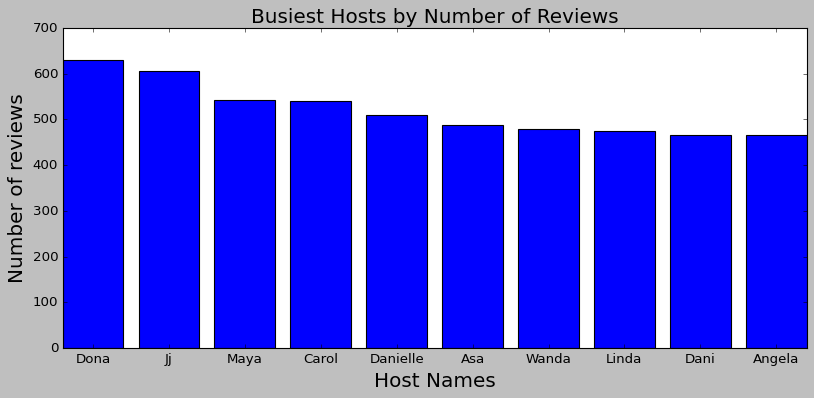

In [36]:
# Visualising the busiest hosts data using bar plot.
plt.figure(figsize=(12,5))
host_name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']
plt.title('Busiest Hosts by Number of Reviews', {'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of reviews',{'fontsize':18})
plt.bar(host_name, reviews)

### Considering Parameter to mesure Busiest Host as **Total No of reviews for each Host** we see Top 5 Hosts as follows:

- Dona
- Jj
- Maya
- Carol
- Danielle

In [37]:
# Lets Find of Busiest Host by Total Night Stay of all customer.
busiest_hosts_by_total_night_stay = df.groupby(['host_name','host_id','room_type','neighbourhood_group'])['minimum_nights'].aggregate(np.sum).reset_index().sort_values('minimum_nights')
busiest_hosts_by_total_night_stay = busiest_hosts_by_total_night_stay.sort_values(by='minimum_nights', ascending=False).head(10)
busiest_hosts_by_total_night_stay

,host_name,host_id,room_type,neighbourhood_group,minimum_nights
4997,Blueground,107434423,Entire home/apt,Manhattan,6720
34143,Sonder (NYC),219517861,Entire home/apt,Manhattan,4337
19505,Kara,30283594,Entire home/apt,Manhattan,3537
17004,Jeremy & Laura,16098958,Entire home/apt,Manhattan,2850
34142,Sonder,12243051,Entire home/apt,Manhattan,2784
8033,Corporate Housing,61391963,Entire home/apt,Manhattan,2760
20321,Ken,22541573,Entire home/apt,Manhattan,2580
20156,Kazuya,137358866,Private room,Queens,2370
29963,Pranjal,200380610,Entire home/apt,Manhattan,1920
37055,Vida,7503643,Entire home/apt,Brooklyn,1560


<BarContainer object of 10 artists>

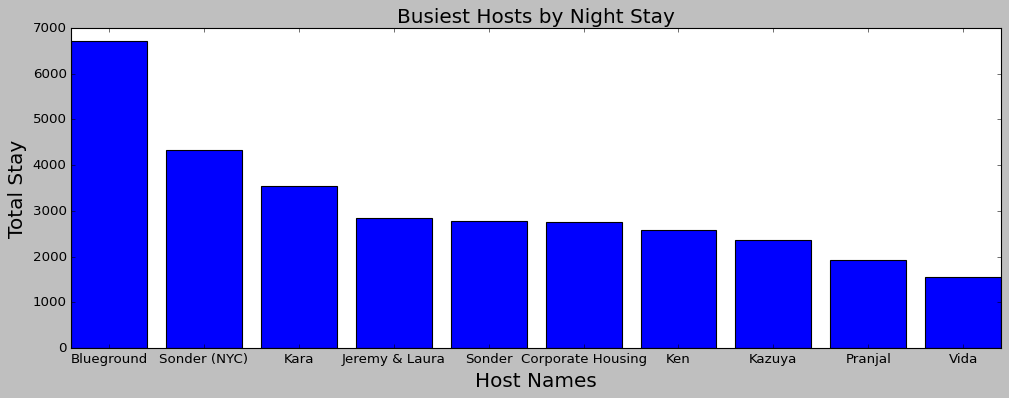

In [38]:
# Visualising the busiest hosts by totay Night stay data through bar plot.
host_name = busiest_hosts_by_total_night_stay['host_name']
stay = busiest_hosts_by_total_night_stay['minimum_nights']
plt.rcParams['figure.figsize'] = (15,5)
plt.title('Busiest Hosts by Night Stay', {'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Total Stay',{'fontsize':18})
plt.bar(host_name, stay)

### Considering Parameter to Mesure Busiest Host as **Total No of Night Stay by all Customer** for each Host we see Top 5 Hosts as follows:

- Blueground
- Sonder (NYC)
- Kara
- Jeremy & Laura
- Sonder

### Also we can see **Busiest Host mostly are those who hosting Either Private rooms or Entire Home/Apt** in both case Lets validate this observation from most preferred Room Type.

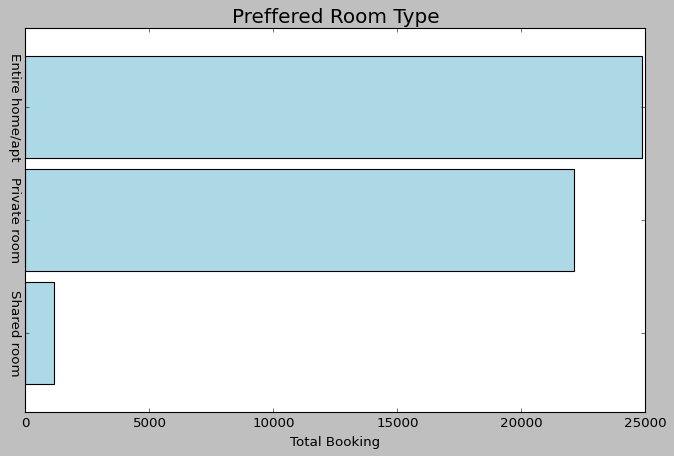

In [39]:
# Plotting histogram for room types to look for which are most preferred room types.
feq=df['room_type'].value_counts().sort_values()
feq[:10].plot.barh(figsize=(10, 6), width=0.9, color = 'lightblue', rot = 270)
plt.title("Preffered Room Type", fontsize=18)
plt.xlabel('Total Booking', fontsize=12)
plt.show()

The above Histogram clearly validate our point that busiest host are one because they hosts Entire home/apt and private room which are the most preferred room types according to above histogram plot


## **<u>Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

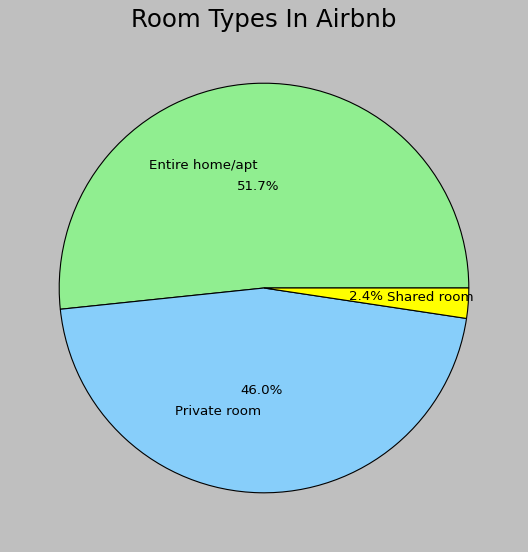

In [40]:
# Checking most Preferred Room type in all Group
labels = df.room_type.value_counts().index
colors = ['lightgreen','lightskyblue','yellow']
explode = [0,0,0]
sizes = df.room_type.value_counts().values

plt.figure(0,figsize = (10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,pctdistance=.5,labeldistance=0.6, autopct='%1.1f%%')
plt.title('Room Types In Airbnb',color = 'black',fontsize = 22)
plt.show()

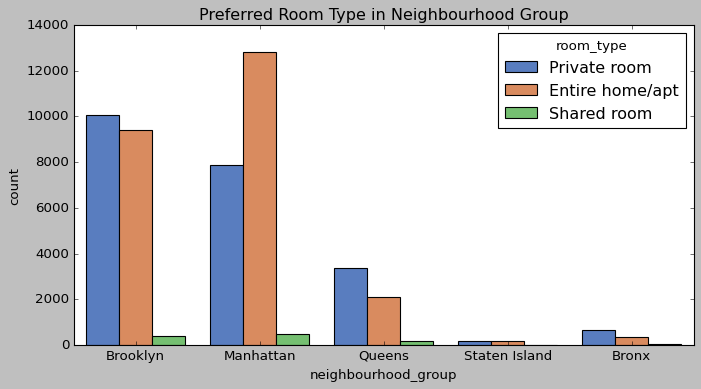

In [41]:
# Checking most Preferred Room type in Different Neighbourhood Group.
plt.figure(figsize=(10,5))
plt.title("Preferred Room Type in Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()

## **<u>Analysis on Based on Room Type?**

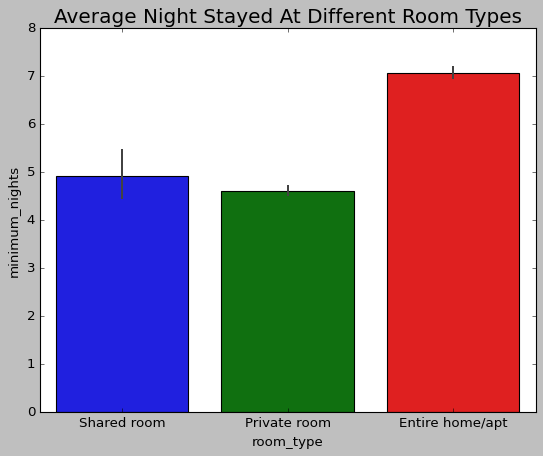

In [42]:
# Comparing the minimum_nights Stay for different Room Type.
plt.style.use('classic')
plt.figure(figsize=(8,6))
plt.title("Average Night Stayed At Different Room Types",color = 'black',fontsize = 18)
result = df.groupby(["room_type"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='room_type', y="minimum_nights", data=df, order=result['room_type'])

We can see Entire Home/Apt has higher night stay. One of the reason we can assume here mostly entire home/Apt are booked for family vacation or group vacation or Functions thus stayed longer compare to Private room or shared room which is mostly booked for official purpuse or some work related purpose.

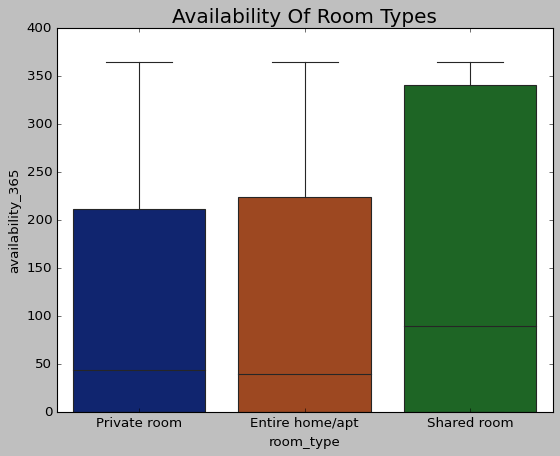

In [43]:
# Checking the availability of different Room Types
plt.style.use('classic')
plt.figure(figsize=(8,6))
plt.title("Availability Of Room Types",color = 'black',fontsize = 18)
sns.boxplot(data=df, x='room_type',y='availability_365',palette="dark")
plt.show() 


- Overall Most Preferred Room Type is Entire Home/Apt Followed by Private Room.
- Except Manhattan where preferred Room is Entire Home/Apt, in all Other Neighbourhood Private room is most preferred followed by Entire home/Apt.

# **<u>6. Key finings and Conclusions**

**Key Findings:**
1.	Sonder (NYC) from Manhattan has the highest Number of Listing, followed by Blueground and Kara.
2.	With 44% Manhattan has the highest no of bookings compare to all other neighborhood group followed by Brooklyn with 41.3%
3.	Top Two neighborhood Group, Manhattan and Brooklyn contribute the 85.3% of total Bookings. 
4.	Williamsburg with 3878 total number booking at the top Followed by Bedford-Stuyvesant from Brooklyn. 
5.	Manhattan his slightly lower reviews 39.9%, compare to the percentage of total booking which is 44%. 
6.	Total night stayed by all customer for a Blueground is highest with 6720 nights in total followed by Sonder (NYC) with 4337 nights.




**Conclusion:**

* We can conclude from the analysis that Manhattan is the Top neighborhood group by number of listings and highest rental prices 7 out of 10 top Host are from Manhattan followed by Brooklyn. One of the Probable reason for most preferred Neighbor Group is that Manhattan is a world-famous for its museums, stores, parks and theatres - and its substantial number of tourists thus attract Entire Home/Apt as favourite stay options and also stayed longer, as demand is high prices are much higher in this borough.

* Brooklyn also has significant number of bookings because in Brooklyn some famous bridges, parks, museums, islands and other tourist places but with more affordable prices as compared to Manhattan. It also received the maximum number of reviews.

* Other Three neighborhood groups namely Queens, Bronx and Staten island are observing very less listing options available, especially on Staten Island. Considering that those are residential areas, it is possible that many guests choose these locations to save up money or perhaps to visit family and friends who live in this area.
